<a href="https://colab.research.google.com/github/xs2445/Algorithms/blob/main/Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Greedy

| Idx | Difficulty | Title |
|-----|-----|-----|
|11|M|Container With Most Water|
|55|M|Jump Game|
|122|M|Best Time to Buy and Sell Stock II|
|309|M|*Best Time to Buy and Sell Stock with Cooldown|
|406|M|Queue Reconstruction by Height|
|714|M|Best Time to Buy and Sell Stock with Transaction Fee|

## 11 M Container With Most Water

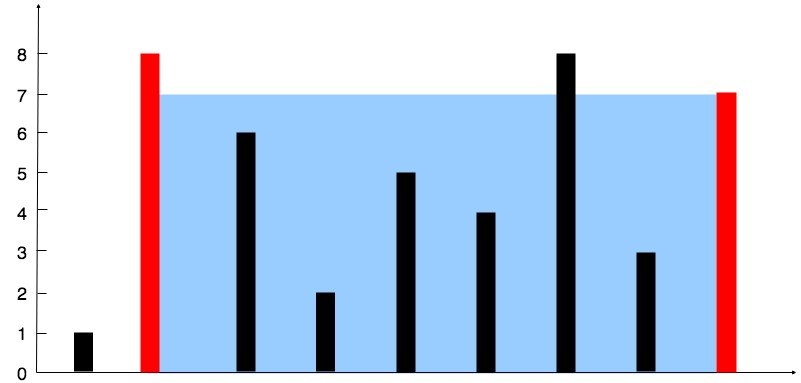

In [ ]:
# Greedy
# two pointer, every time move the shorter one
# this is because the area depends on the shorter height

class Solution:
    def maxArea(self, height: List[int]) -> int:
        if len(height)<2:
            return 0
        pl, pr = 0, len(height)-1
        max_a = 0
        while pl < pr:
            max_a = max(max_a, (pr-pl) * min(height[pl], height[pr]))
            if height[pl] <= height[pr]:
                pl += 1
            else:
                pr -= 1
        return max_a

## 55 M Jump Game

In [ ]:
# # backtracking
# # time exceeded --- inefficient
# class Solution:
#     def canJump(self, nums: List[int]) -> bool:
#         def backtracking(idx):
#             if idx >= len(nums)-1:
#                 return True
#             for i in reversed(range(1, nums[idx]+1)):
#                 if backtracking(idx+i):
#                     return True
#             return False
#         return backtracking(0)
                
# # DP
# class Solution:
#     def canJump(self, nums: List[int]) -> bool:
#         # dp[i] is the number of jumps left to get to position i
#         # dp[i] = max(dp[i-1], nums[i-1]) - 1
#         # if dp[j] < 0, means impossible to get to this possition
#         # then return false
#         # otherwise return true
#         dptable = [0] * len(nums)
#         for i in range(1,len(nums)):
#             dptable[i] = max(dptable[i-1], nums[i-1]) - 1
#             if dptable[i] < 0:
#                 return False
#         return True
    
# greedy
# calculate the farest position can get to in each step
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        # keep the farest position at each step
        far = 0
        for i in range(0,len(nums)-1):
            # once can not reach current position
            # or already able to get to the end position
            if i > far or far >= len(nums)-1:
                break
            far = max(far, i+nums[i])
        return far >= len(nums)-1
        

## 122 M Best Time to Buy and Sell Stock II

In [ ]:
# can buy and/or sell stock
# can make unlimited transaction
# can hold at most one at the same time
# then just simply add all the bottom-vally through one traversal
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        profit = 0
        for i in range(1,len(prices)):
            if prices[i] > prices[i-1]:
                profit += prices[i]-prices[i-1] 
        return profit

# 123 Best Time to Buy and Sell Stock III is in DP section

## 309 M Best Time to Buy and Sell Stock with Cooldown

also an DP version in DP section

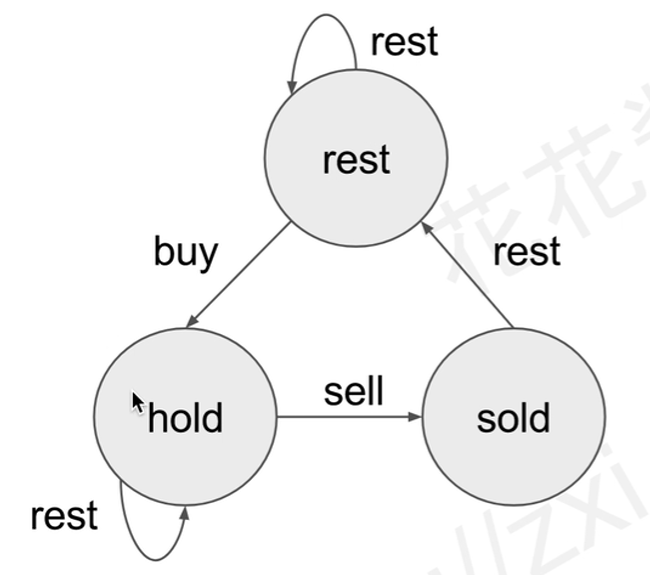

In [ ]:
# After you sell your stock, you cannot buy stock on the next day (i.e., cooldown one day).
# free is the maximum profit I can have while being free to buy.
# have is the maximum profit I can have while having stock.
# cool is the maximum profit I can have while cooling down.
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        free = 0
        have = cool = float('-inf')
        for p in prices:
            free, have, cool = max(free, cool), max(have, free - p), have + p
        return max(free, cool)
# free (no transaction this round):
#   = max( free (do nothing), cool (not able to do transaction) )
# have (able to do transaction)
#   = max( have (), )
# cool (can do nothing)
#   = have + price

## 406 M Queue Reconstruction by Height 


In [ ]:
class Solution:
    def reconstructQueue(self, people: List[List[int]]) -> List[List[int]]:
        # insert hi number in decending order,
        # for each hi number, insert ki number in ascending order
        people.sort(key = lambda x: (-x[0], x[1]))
        output = []
        for p in people:
            output.insert(p[1], p)
        return output

## 714 M Best Time to Buy and Sell Stock with Transaction Fee 

In [ ]:
# DP
# cashi = max(cashi-1, holdi-1 + pi - fee)
# holdi = max(holdi-1, cashi-1 - pi)

class Solution:
    def maxProfit(self, prices: List[int], fee: int) -> int:
        cash, hold = 0, float('-inf')
        for p in prices:
            hold = max(hold, cash-p)
            cash = max(cash, hold+p-fee)
        return cash

In [ ]:
# Greedy
class Solution:
    def maxProfit(self, prices: List[int], fee: int) -> int:
        ans = 0
        minimum = prices[0]
        for i in range(1, len(prices)):
            if prices[i] < minimum:
                minimum = prices[i]
            elif prices[i] > minimum + fee:
                # greedy, if have profit larger than fee
                ans += prices[i] - minimum - fee
                # for better choices, as if this transaction didn't happend
                minimum = prices[i] - fee
        return ans

Most consistent ways of dealing with the series of stock problems:

https://leetcode.com/problems/best-time-to-buy-and-sell-stock-with-transaction-fee/solutions/108870/most-consistent-ways-of-dealing-with-the-series-of-stock-problems/?orderBy=hot